In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Report dates not available for UTSW
Report dates not available for Emory
median = 226.0 days


Text(226.0, 15, '  Median: 7.5 months')

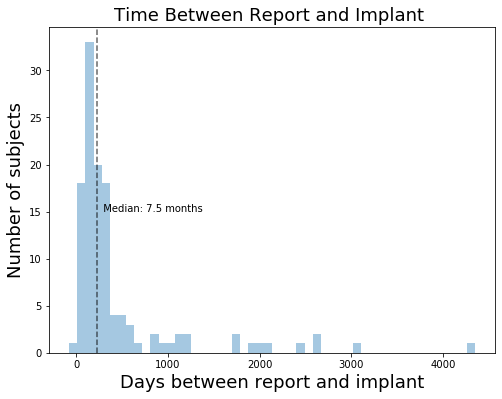

In [79]:
#Set to 'All' for aggregate data or a specific site name for site-only data
site = 'All'
sd = {'Jefferson', 'Dartmouth', 'Emory', 'UTSW'}

if (site != 'All'):
#     df = pd.read_excel(r'./' + site + '_neuropsych.xlsx')
    df = pd.read_excel(r'./' + site + '_neuropsych.xlsx',engine="openpyxl")
time_gap = []

#Will only include sites that have date of report extracted from REDCap
if site == 'All':
    for k in sd:
        try:
            df = pd.read_excel(r'./' + k + '_neuropsych.xlsx',engine="openpyxl")
            for i in df.index:
                gap = df.iloc[i]['Time between report and implant (days)']
                if np.isnan(gap)==False:
                    time_gap.append(gap)
        except:
            print('Report dates not available for', k)
else:
    for i in df.index:
        gap = df.iloc[i]['Time between report and implant (days)']
        if np.isnan(gap)==False:
            time_gap.append(gap)
    
mean = np.mean(time_gap)
med = np.median(time_gap)
    
plt.figure(figsize=(8,6))
time_hist = plt.hist(time_gap, 50,alpha=0.4)
plt.xlabel('Days between report and implant',fontsize=18)
plt.ylabel('Number of subjects',fontsize=18)
# plt.title('Time Between Report and Implant: '+ site,fontsize=18)
plt.title('Time Between Report and Implant ',fontsize=18)

# plt.axvline(x=mean, color='k', linestyle='--',alpha=0.5)
plt.axvline(x=med, color='k', linestyle='--',alpha=0.6)
# print('mean =', mean, 'days')
print('median =', med, 'days')
plt.text(med,15,'  Median: %.1f months' %(med/30))

mean = 11.688235294117646
median = 9.0
170 of 387 subjects have BAI = 0.4392764857881137
168 of 387 subjects have both scores = 0.43410852713178294


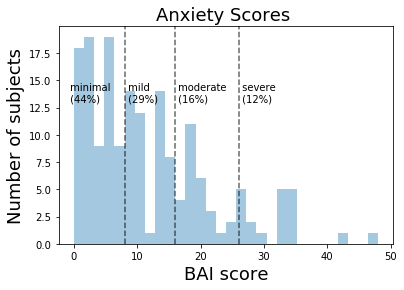

In [83]:
BAI = []
count = 0
both = 0
selected = 0
N = 0

if site == 'All':
    for k in sd:
        df = pd.read_excel(r'./' + k + '_neuropsych.xlsx',engine="openpyxl")
        for i in df.index:
            score = df.iloc[i]['BAI']
            if np.isnan(score)==False:
                BAI.append(df.iloc[i]['BAI'])
                count = count + 1
                if df.iloc[i]['BAI'] > 18:
                    selected = selected + 1
                if np.isnan(df.iloc[i]['BDI'])==False:
                    both = both + 1
        N = N + len(df.index)
else:
    for i in df.index:
        score = df.iloc[i]['BAI']
        if np.isnan(score)==False:
            BAI.append(df.iloc[i]['BAI'])
            count = count + 1
            if df.iloc[i]['BAI'] > 18:
                    selected = selected + 1
            if np.isnan(df.iloc[i]['BDI'])==False:
                both = both + 1
    N = len(df.index)
    
mean = np.mean(BAI)
med = np.median(BAI)
ratio = float(count/N)
brat = float(both/N)
    
time_hist = plt.hist(BAI, 30,alpha=0.4)
plt.xlabel('BAI score',fontsize=18)
plt.ylabel('Number of subjects',fontsize=18)
# plt.title('Anxiety Scores: '+ site,fontsize=18)
plt.title('Anxiety Scores ',fontsize=18)

# plt.axvline(x=mean, color='k', linestyle='--')
print('mean =', mean)
print('median =', med)
print(count, 'of', N, 'subjects have BAI =', ratio)
print(both, 'of', N, 'subjects have both scores =', brat)
selected

# cutoffs
mild=8
moderate=16
severe=26

min_perc=(np.sum(np.logical_and(np.array(BAI)>=0,np.array(BAI)<mild))/len(BAI))*100
mild_perc=(np.sum(np.logical_and(np.array(BAI)>=mild,np.array(BAI)<moderate))/len(BAI))*100
moderate_perc=(np.sum(np.logical_and(np.array(BAI)>=moderate,np.array(BAI)<severe))/len(BAI))*100
severe_perc=(np.sum(np.array(BAI)>=severe)/len(BAI))*100

plt.text(-1,13,' minimal \n (%.0f%%)' %min_perc)
plt.text(mild,13,' mild \n (%.0f%%)' %mild_perc)
plt.text(moderate,13,' moderate \n (%.0f%%)' %moderate_perc)
plt.text(severe,13,' severe \n (%.0f%%)' %severe_perc)
plt.axvline(mild, color='k', linestyle='--',alpha=0.6)
plt.axvline(moderate, color='k', linestyle='--',alpha=0.6)
plt.axvline(severe, color='k', linestyle='--',alpha=0.6)



mean = 14.048387096774194
median = 11.0
186 of 387 subjects have BDI = 0.4392764857881137


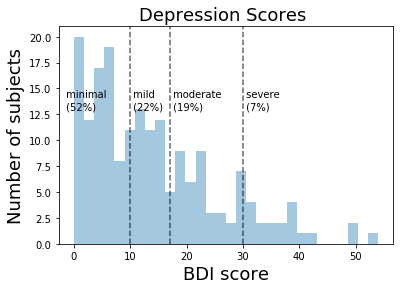

In [86]:
BDI = []
count = 0
N = 0
selected = 0

if site == 'All':
    for k in sd:
        df = pd.read_excel(r'./' + k + '_neuropsych.xlsx',engine="openpyxl")
        for i in df.index:
            score = df.iloc[i]['BDI']
            if np.isnan(score)==False:
                BDI.append(df.iloc[i]['BDI'])
                count = count + 1
                if df.iloc[i]['BDI'] > 16:
                    selected = selected + 1
        N = N + len(df.index)
else:
    for i in df.index:
        score = df.iloc[i]['BDI']
        if np.isnan(score)==False:
            BDI.append(df.iloc[i]['BDI'])
            count = count + 1
            if df.iloc[i]['BDI'] > 16:
                    selected = selected + 1
                    
mean = np.mean(BDI)
med = np.median(BDI)
#ratio = float(count/N)
    
time_hist = plt.hist(BDI, 30,alpha=0.4)
plt.xlabel('BDI score',fontsize=18)
plt.ylabel('Number of subjects',fontsize=18)
# plt.title('Depression Scores: '+ site,fontsize=18)
plt.title('Depression Scores ',fontsize=18)


# plt.axvline(x=mean, color='k', linestyle='--')
# plt.axvline(x=med, color='r', linestyle='--')
print('mean =', mean)
print('median =', med)
print(count, 'of', N, 'subjects have BDI =', ratio)
selected

# scores from 0 to 9 represent minimal depressive symptoms, scores of 10 to 16 indicate mild depression, scores of 17 to 29 indicate moderate depression, and scores of 30 to 63 indicate severe depression.
# cutoffs
mild=10
moderate=17
severe=30

min_perc=(np.sum(np.logical_and(np.array(BAI)>=0,np.array(BAI)<mild))/len(BAI))*100
mild_perc=(np.sum(np.logical_and(np.array(BAI)>=mild,np.array(BAI)<moderate))/len(BAI))*100
moderate_perc=(np.sum(np.logical_and(np.array(BAI)>=moderate,np.array(BAI)<severe))/len(BAI))*100
severe_perc=(np.sum(np.array(BAI)>=severe)/len(BAI))*100

plt.text(-2,13,' minimal \n (%.0f%%)' %min_perc)
plt.text(mild,13,' mild \n (%.0f%%)' %mild_perc)
plt.text(moderate,13,' moderate \n (%.0f%%)' %moderate_perc)
plt.text(severe,13,' severe \n (%.0f%%)' %severe_perc)
plt.axvline(mild, color='k', linestyle='--',alpha=0.6)
plt.axvline(moderate, color='k', linestyle='--',alpha=0.6)
plt.axvline(severe, color='k', linestyle='--',alpha=0.6)



In [45]:
norep = []
oldrep = []

df
for i in df.index:
    typ = df.iloc[i]['Type of report']
    gap = df.iloc[i]['Time between report and implant (days)']
    if typ=='None':
        norep.append(df.iloc[i]['Subject Number'])
    if gap > 182:
        oldrep.append(df.iloc[i]['Subject Number'])
len(oldrep)

30